# ***NAME : VAIBHAV BILOTIA***
# ***ROLL NO : 001811001036***
# ***DEPARTMENT : INFORMATION TECHNOLOGY***
# ***MACHINE LEARNING LAB***
# ***ASSIGNMENT - 5***
# ***GitHub Link: [Link](https://github.com/vaibhav1311/JU_IT_ML_Assignments/tree/main/Assignment_5)***

## Imports

In [ ]:
!pip install --no-cache gym[all]
!pip install IPython
!pip install Box2D

     |████████████████████████████████| 448 kB 4.1 MB/s 
     |████████████████████████████████| 120 kB 61.7 MB/s 
     |████████████████████████████████| 205 kB 52.2 MB/s 
  ERROR: Failed building wheel for mujoco-py
  Running setup.py clean for mujoco-py
Failed to build mujoco-py
    Running setup.py install for mujoco-py ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-7uuogwls/mujoco-py_d8fc0a1325eb4c7e9700987ee559cab2/setup.py'"'"'; __file__='"'"'/tmp/pip-install-7uuogwls/mujoco-py_d8fc0a1325eb4c7e9700987ee559cab2/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-n5xniv2r/install-record.txt --single-version-externally-man

In [ ]:
from __future__ import print_function
import os, sys, time, datetime, json, random
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import SGD , Adam, RMSprop
from keras.layers.advanced_activations import PReLU
import pylab as plt
import networkx as nx
from keras import models
from keras import layers
from collections import deque
import random

import gym
import pickle
from itertools import product

from matplotlib.pyplot import cm

from collections import defaultdict



#Shortest Path Using Reinforcement Learning


In [ ]:
# map cell to cell, add circular cell to goal point
points_list = [(0,1), (2,5), (5,6), (4,5), (3,7), (2,3), (2,1)]

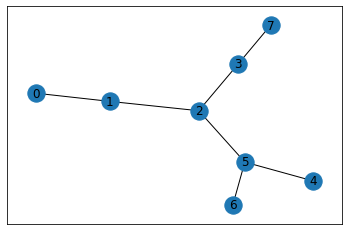

In [ ]:
goal = 7

G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [ ]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [ ]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]]= 0

R[goal,goal]= 100

print(R)

(0, 1)
(2, 5)
(5, 6)
(4, 5)
(3, 7)
(2, 3)
(2, 1)
[[ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.  -1.   0.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1. 100.]]


In [ ]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):

  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state, action, gamma)

max_value 0.0


0

In [ ]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
m

Most efficient path: [0, 1, 2, 3, 7]


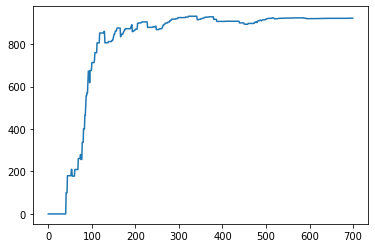

In [ ]:
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,]
        == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print(f"Most efficient path: {steps}")
plt.plot(scores)
plt.show()



#Shortest Path Using Deep Reinforcement Learning


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
maze = np.array([
    [ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
    [ 0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.],
    [ 1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.],
    [ 1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
    [ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.]
])

In [ ]:
visited_mark = 0.8  # Cells visited by the rat will be painted by grayscale value 0.8
rat_mark = 0.5      # The current rat cell will be painteg by grayscale value 0.5
LEFT, UP, RIGHT, DOWN = 0, 1, 2, 3

# Actions memo
actions_dict = {
    LEFT: 'left',
    UP: 'up',
    RIGHT: 'right',
    DOWN: 'down',
}

num_actions = len(actions_dict)

epsilon = 0.1   # Exploration factor

In [ ]:
# maze is a 2d Numpy array of floats between 0.0 to 1.0
# 1.0 corresponds to a free cell, and 0.0 an occupied cell
# rat = (row, col) initial rat position (defaults to (0,0))

class Qmaze(object):
    def __init__(self, maze, rat=(0,0)):
        self._maze = np.array(maze)
        nrows, ncols = self._maze.shape
        self.target = (nrows-1, ncols-1)   # target cell where the "cheese" is
        self.free_cells = [(r,c) for r in range(nrows) for c in range(ncols) if self._maze[r,c] == 1.0]
        self.free_cells.remove(self.target)
        if self._maze[self.target] == 0.0:
            raise Exception("Invalid maze: target cell cannot be blocked!")
        if not rat in self.free_cells:
            raise Exception("Invalid Rat Location: must sit on a free cell")
        self.reset(rat)

    def reset(self, rat):
        self.rat = rat
        self.maze = np.copy(self._maze)
        nrows, ncols = self.maze.shape
        row, col = rat
        self.maze[row, col] = rat_mark
        self.state = (row, col, 'start')
        self.min_reward = -0.5 * self.maze.size
        self.total_reward = 0
        self.visited = set()

    def update_state(self, action):
        nrows, ncols = self.maze.shape
        nrow, ncol, nmode = rat_row, rat_col, mode = self.state

        if self.maze[rat_row, rat_col] > 0.0:
            self.visited.add((rat_row, rat_col))  # mark visited cell

        valid_actions = self.valid_actions()
                
        if not valid_actions:
            nmode = 'blocked'
        elif action in valid_actions:
            nmode = 'valid'
            if action == LEFT:
                ncol -= 1
            elif action == UP:
                nrow -= 1
            if action == RIGHT:
                ncol += 1
            elif action == DOWN:
                nrow += 1
        else:                  # invalid action, no change in rat position
            mode = 'invalid'

        # new state
        self.state = (nrow, ncol, nmode)

    def get_reward(self):
        rat_row, rat_col, mode = self.state
        nrows, ncols = self.maze.shape
        if rat_row == nrows-1 and rat_col == ncols-1:
            return 1.0
        if mode == 'blocked':
            return self.min_reward - 1
        if (rat_row, rat_col) in self.visited:
            return -0.25
        if mode == 'invalid':
            return -0.75
        if mode == 'valid':
            return -0.04

    def act(self, action):
        self.update_state(action)
        reward = self.get_reward()
        self.total_reward += reward
        status = self.game_status()
        envstate = self.observe()
        return envstate, reward, status

    def observe(self):
        canvas = self.draw_env()
        envstate = canvas.reshape((1, -1))
        return envstate

    def draw_env(self):
        canvas = np.copy(self.maze)
        nrows, ncols = self.maze.shape
        # clear all visual marks
        for r in range(nrows):
            for c in range(ncols):
                if canvas[r,c] > 0.0:
                    canvas[r,c] = 1.0
        # draw the rat
        row, col, valid = self.state
        canvas[row, col] = rat_mark
        return canvas

    def game_status(self):
        if self.total_reward < self.min_reward:
            return 'lose'
        rat_row, rat_col, mode = self.state
        nrows, ncols = self.maze.shape
        if rat_row == nrows-1 and rat_col == ncols-1:
            return 'win'

        return 'not_over'

    def valid_actions(self, cell=None):
        if cell is None:
            row, col, mode = self.state
        else:
            row, col = cell
        actions = [0, 1, 2, 3]
        nrows, ncols = self.maze.shape
        if row == 0:
            actions.remove(1)
        elif row == nrows-1:
            actions.remove(3)

        if col == 0:
            actions.remove(0)
        elif col == ncols-1:
            actions.remove(2)

        if row>0 and self.maze[row-1,col] == 0.0:
            actions.remove(1)
        if row<nrows-1 and self.maze[row+1,col] == 0.0:
            actions.remove(3)

        if col>0 and self.maze[row,col-1] == 0.0:
            actions.remove(0)
        if col<ncols-1 and self.maze[row,col+1] == 0.0:
            actions.remove(2)

        return actions

In [ ]:
def show(qmaze):
    plt.grid('on')
    nrows, ncols = qmaze.maze.shape
    ax = plt.gca()
    ax.set_xticks(np.arange(0.5, nrows, 1))
    ax.set_yticks(np.arange(0.5, ncols, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    canvas = np.copy(qmaze.maze)
    for row,col in qmaze.visited:
        canvas[row,col] = 0.6
    rat_row, rat_col, _ = qmaze.state
    canvas[rat_row, rat_col] = 0.3   # rat cell
    canvas[nrows-1, ncols-1] = 0.9 # cheese cell
    img = plt.imshow(canvas, interpolation='none', cmap='gray')
    return img

In [ ]:
maze = [
    [ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.],
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.],
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.]
]

reward= -0.04


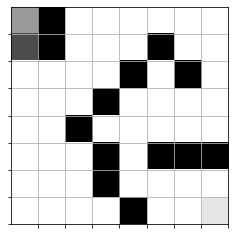

In [ ]:
qmaze = Qmaze(maze)
canvas, reward, game_over = qmaze.act(DOWN)
print("reward=", reward)
show(qmaze)

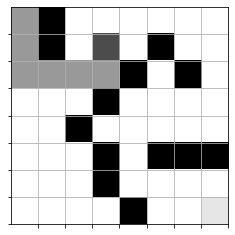

In [ ]:
qmaze.act(DOWN)  # move down
qmaze.act(RIGHT)  # move right
qmaze.act(RIGHT)  # move right
qmaze.act(RIGHT)  # move right
qmaze.act(UP)  # move up
show(qmaze)

In [ ]:
def play_game(model, qmaze, rat_cell):
    qmaze.reset(rat_cell)
    envstate = qmaze.observe()
    while True:
        prev_envstate = envstate
        # get next action
        q = model.predict(prev_envstate)
        action = np.argmax(q[0])

        # apply action, get rewards and new state
        envstate, reward, game_status = qmaze.act(action)
        if game_status == 'win':
            return True
        elif game_status == 'lose':
            return False

In [ ]:
def completion_check(model, qmaze):
    for cell in qmaze.free_cells:
        if not qmaze.valid_actions(cell):
            return False
        if not play_game(model, qmaze, cell):
            return False
    return True

In [ ]:
class Experience(object):
    def __init__(self, model, max_memory=100, discount=0.95):
        self.model = model
        self.max_memory = max_memory
        self.discount = discount
        self.memory = list()
        self.num_actions = model.output_shape[-1]

    def remember(self, episode):
        self.memory.append(episode)
        if len(self.memory) > self.max_memory:
            del self.memory[0]

    def predict(self, envstate):
        return self.model.predict(envstate)[0]

    def get_data(self, data_size=10):
        env_size = self.memory[0][0].shape[1]   # envstate 1d size (1st element of episode)
        mem_size = len(self.memory)
        data_size = min(mem_size, data_size)
        inputs = np.zeros((data_size, env_size))
        targets = np.zeros((data_size, self.num_actions))
        for i, j in enumerate(np.random.choice(range(mem_size), data_size, replace=False)):
            envstate, action, reward, envstate_next, game_over = self.memory[j]
            inputs[i] = envstate
            # There should be no target values for actions not taken.
            targets[i] = self.predict(envstate)
            # Q_sa = derived policy = max quality env/action = max_a' Q(s', a')
            Q_sa = np.max(self.predict(envstate_next))
            if game_over:
                targets[i, action] = reward
            else:
                # reward + gamma * max_a' Q(s', a')
                targets[i, action] = reward + self.discount * Q_sa
        return inputs, targets

In [ ]:
def qtrain(model, maze, **opt):
    global epsilon
    n_epoch = opt.get('n_epoch', 15000)
    max_memory = opt.get('max_memory', 1000)
    data_size = opt.get('data_size', 50)
    weights_file = opt.get('weights_file', "")
    name = opt.get('name', 'model')
    start_time = datetime.datetime.now()

    if weights_file:
        print("loading weights from file: %s" % (weights_file,))
        model.load_weights(weights_file)

    qmaze = Qmaze(maze)

    # Initialize experience replay object
    experience = Experience(model, max_memory=max_memory)

    win_history = []   # history of win/lose game
    n_free_cells = len(qmaze.free_cells)
    hsize = qmaze.maze.size//2   # history window size
    win_rate = 0.0
    imctr = 1

    for epoch in range(n_epoch):
        loss = 0.0
        rat_cell = random.choice(qmaze.free_cells)
        qmaze.reset(rat_cell)
        game_over = False

        # get initial envstate (1d flattened canvas)
        envstate = qmaze.observe()

        n_episodes = 0
        while not game_over:
            valid_actions = qmaze.valid_actions()
            if not valid_actions: break
            prev_envstate = envstate
            # Get next action
            if np.random.rand() < epsilon:
                action = random.choice(valid_actions)
            else:
                action = np.argmax(experience.predict(prev_envstate))

            # Apply action, get reward and new envstate
            envstate, reward, game_status = qmaze.act(action)
            if game_status == 'win':
                win_history.append(1)
                game_over = True
            elif game_status == 'lose':
                win_history.append(0)
                game_over = True
            else:
                game_over = False

            # Store episode (experience)
            episode = [prev_envstate, action, reward, envstate, game_over]
            experience.remember(episode)
            n_episodes += 1

            # Train neural network model
            inputs, targets = experience.get_data(data_size=data_size)
            h = model.fit(
                inputs,
                targets,
                epochs=8,
                batch_size=16,
                verbose=0,
            )
            loss = model.evaluate(inputs, targets, verbose=0)

        if len(win_history) > hsize:
            win_rate = sum(win_history[-hsize:]) / hsize
    
        dt = datetime.datetime.now() - start_time
        t = format_time(dt.total_seconds())
        template = "Epoch: {:03d}/{:d} | Loss: {:.4f} | Episodes: {:d} | Win count: {:d} | Win rate: {:.3f} | time: {}"
        print(template.format(epoch, n_epoch-1, loss, n_episodes, sum(win_history), win_rate, t))
        # we simply check if training has exhausted all free cells and if in all
        # cases the agent won
        if win_rate > 0.9 : epsilon = 0.05
        if sum(win_history[-hsize:]) == hsize and completion_check(model, qmaze):
            print("Reached 100%% win rate at epoch: %d" % (epoch,))
            break

    # Save trained model weights and architecture, this will be used by the visualization code
    h5file = name + ".h5"
    json_file = name + ".json"
    model.save_weights(h5file, overwrite=True)
    with open(json_file, "w") as outfile:
        json.dump(model.to_json(), outfile)
    end_time = datetime.datetime.now()
    dt = datetime.datetime.now() - start_time
    seconds = dt.total_seconds()
    t = format_time(seconds)
    print('files: %s, %s' % (h5file, json_file))
    print("n_epoch: %d, max_mem: %d, data: %d, time: %s" % (epoch, max_memory, data_size, t))
    return seconds

# This is a small utility for printing readable time strings:
def format_time(seconds):
    if seconds < 400:
        s = float(seconds)
        return "%.1f seconds" % (s,)
    elif seconds < 4000:
        m = seconds / 60.0
        return "%.2f minutes" % (m,)
    else:
        h = seconds / 3600.0
        return "%.2f hours" % (h,)

In [ ]:
def build_model(maze, lr=0.001):
    model = Sequential()
    model.add(Dense(maze.size, input_shape=(maze.size,)))
    model.add(PReLU())
    model.add(Dense(maze.size))
    model.add(PReLU())
    model.add(Dense(num_actions))
    model.compile(optimizer='adam', loss='mse')
    return model

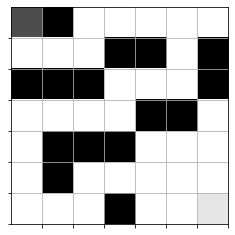

In [ ]:
maze =  np.array([
    [ 1.,  0.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  0.,  0.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  0.,  0.,  1.],
    [ 1.,  0.,  0.,  0.,  1.,  1.,  1.],
    [ 1.,  0.,  1.,  1.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.]
])

qmaze = Qmaze(maze)
show(qmaze)

In [ ]:
model = build_model(maze)
qtrain(model, maze, epochs=100, max_memory=8*maze.size, data_size=32)

Epoch: 000/14999 | Loss: 0.0023 | Episodes: 106 | Win count: 0 | Win rate: 0.000 | time: 302.9 seconds
Epoch: 001/14999 | Loss: 0.0565 | Episodes: 111 | Win count: 0 | Win rate: 0.000 | time: 11.24 minutes
Epoch: 002/14999 | Loss: 0.0019 | Episodes: 104 | Win count: 0 | Win rate: 0.000 | time: 17.00 minutes
Epoch: 003/14999 | Loss: 0.0034 | Episodes: 29 | Win count: 1 | Win rate: 0.000 | time: 18.56 minutes
Epoch: 004/14999 | Loss: 0.0485 | Episodes: 104 | Win count: 1 | Win rate: 0.000 | time: 24.11 minutes
Epoch: 005/14999 | Loss: 0.0041 | Episodes: 106 | Win count: 1 | Win rate: 0.000 | time: 29.78 minutes
Epoch: 006/14999 | Loss: 0.0135 | Episodes: 106 | Win count: 1 | Win rate: 0.000 | time: 35.53 minutes
Epoch: 007/14999 | Loss: 0.0029 | Episodes: 107 | Win count: 1 | Win rate: 0.000 | time: 41.35 minutes
Epoch: 008/14999 | Loss: 0.0016 | Episodes: 104 | Win count: 1 | Win rate: 0.000 | time: 46.99 minutes
Epoch: 009/14999 | Loss: 0.0013 | Episodes: 104 | Win count: 1 | Win rate:

#Reinforcement Learning

## MountainCar-v0

In [ ]:
class State:
  def __init__(self, position_tile, velocity_tile):
    self.position_tile = position_tile
    self.velocity_tile = velocity_tile

  def __eq__(self, other):
    if isinstance(other, State):
      return (self.position_tile == other.position_tile and
              self.velocity_tile == other.velocity_tile)
    else:
      return False

  def __hash__(self):
    return hash((self.position_tile, self.velocity_tile))

In [ ]:
ACTIONS_COUNT = 3
eps_greedy = 0

def find_best_action_quality(Q, state):
  best_action, best_q = None, None
  for action in range(ACTIONS_COUNT):
    cur_q = Q[(state, action)]
    if best_q is None or best_q < cur_q:
      best_action, best_q = action, cur_q
  return best_action, best_q


def choose_eps_greedy_action(Q, state):
  best_action, best_q = find_best_action_quality(Q, state)
  best_count = 0
  for action in range(ACTIONS_COUNT):
    if Q[(state, action)] == best_q:
        best_count += 1
  p = []
  for action in range(ACTIONS_COUNT):
    prob = eps_greedy / ACTIONS_COUNT
    if Q[(state, action)] == best_q:
      prob += (1 - eps_greedy) / best_count
    p.append(prob)
  return np.random.choice(ACTIONS_COUNT, 1, p=p)[0]


def map_observation_to_state(observation, position_grid, velocity_grid):
  return State(int(round(observation[0] / position_grid)),
                int(round(observation[1] / velocity_grid)))

In [ ]:
training_episodes = 5000
timesteps_limit = 200  # limit from OpenAI gym docs
gamma = 0.9

def evaluate_parameters(alpha, position_grid, velocity_grid):
  env = gym.make('MountainCar-v0')
  env.seed(0)
  np.random.seed(0)
  cumulative_completion = []
  completed = 0
  Q = defaultdict(lambda: 0.0)
  for episode in range(training_episodes):
    observation = env.reset()
    state = map_observation_to_state(
      observation, position_grid, velocity_grid)
    action = choose_eps_greedy_action(Q, state)
    for timestep in range(timesteps_limit):
      observation, reward, done, info = env.step(action)
      to_state = map_observation_to_state(
        observation, position_grid, velocity_grid)
      next_action = choose_eps_greedy_action(Q, to_state)
      Q[(state, action)] += alpha * (reward +
                                      gamma * Q[(to_state, action)] -
                                      Q[(state, action)])
      action, state = next_action, to_state
      if done:
        if timestep != timesteps_limit - 1:
          completed += 1
        cumulative_completion.append(completed)
        break
  env.close()
  return cumulative_completion

In [ ]:
def evaluate_and_plot_parameters(alpha, position_grid, velocity_grid, color):
  cumulative_completion = evaluate_parameters(alpha, position_grid, velocity_grid)
  title = f'alpha={alpha} pos_grid={position_grid} vel_grid={velocity_grid}'
  print(f'Evaluated {title}')
  line, = plt.plot(
      np.arange(1, training_episodes + 1),
      cumulative_completion,
      c=next(color),
      label=title)
  return line

Evaluated alpha=0.25 pos_grid=0.05 vel_grid=0.01


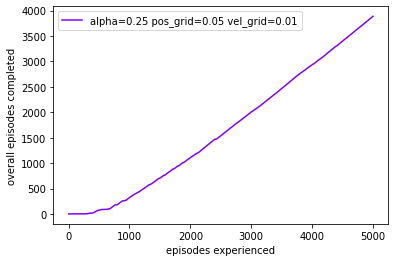

In [ ]:
color = iter(cm.rainbow(np.linspace(0, 1, 5)))
handles = []

alpha, position_grid, velocity_grid = 0.25, 0.05, 0.01
handles.append(evaluate_and_plot_parameters(
  alpha, position_grid, velocity_grid, color
))

plt.xlabel('episodes experienced')
plt.ylabel('overall episodes completed')
plt.legend(handles=handles)

## Roulette

In [ ]:
class Model(object):
	def __init__(self, *args):
		if not args is None:
			self.env = args[0]
			self.Q = args[1]
			self.alpha = args[2]
			self.gamma = args[3]
			self.epsilon = args[4]
			self.n_episodes = args[5]
			self.verbose = args[6]
			self.record_training = args[7]
			self.checkpoint = self.n_episodes * 0.1
		else:
			print('Invalid arguments.')

	def eps_greedy(self, obs):
		if np.random.uniform() < self.epsilon:
			return np.random.randint(self.env.action_space.n)
		else:
			action_values = [self.Q[obs, a] for a in 
							 range(self.env.action_space.n)]
			greedy_idx = np.argwhere(action_values == np.max(action_values))
			greedy_act_idx = np.random.choice(greedy_idx.flatten())
			return greedy_act_idx

	def greedy_action(self, obs):
		action_values = [self.Q[obs, a] for a in 
						 range(self.env.action_space.n)]
		greedy_idx = np.argmax(action_values)
		return greedy_idx

	def train(self, idx=None, q=None):
		if self.record_training:
			self.all_rewards = []

		for episode in range(self.n_episodes):
			done = False
			obs = self.env.reset()
			if self.record_training:
				episode_reward = 0
			a = self.eps_greedy(obs)

			while not done:
				obs_prime, reward, done, info = self.env.step(a)
				a_prime = self.eps_greedy(obs_prime)
				self.Q[obs,a] += self.alpha * (reward + self.gamma*self.Q[obs_prime, a] -
												   self.Q[obs, a])
				if self.record_training:
					episode_reward += reward
				obs = obs_prime
				a = a_prime
				
				
			if self.record_training:
				self.all_rewards.append(episode_reward)
			if self.verbose and episode % self.checkpoint == 0:
				if not idx is None:
					print(f'Agent: {idx} Episode: {episode}')
				else:
					print(f'Episode: {episode}')
		if not q is None:
			q.put(self)
		if not idx is None:
			print(f'Agent: {idx} - Training complete.')
		else:
			print('Training complete.')

In [ ]:
# Initialize environment, hyperparameters and action value function.
gamma = 1
alpha = 0.1
epsilon = 0.1
n_epsiodes = 10000
env = gym.make('Roulette-v0')
Q = dict.fromkeys(product([0], range(38)), 0.0)

# Create and train agent.
agent = Model(env, Q, alpha, gamma, epsilon, n_epsiodes, True, False)
agent.train()

Episode: 0
Episode: 1000
Episode: 2000
Episode: 3000
Episode: 4000
Episode: 5000
Episode: 6000
Episode: 7000
Episode: 8000
Episode: 9000
Training complete.


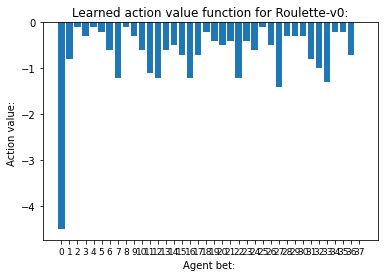

In [ ]:
action_values = np.array([i for i in agent.Q.values()])
plt.bar(range(len(action_values)), action_values)
plt.xticks(range(len(action_values)))
plt.tick_params(axis='x', which='major', labelsize=9)
plt.xlabel('Agent bet: ')
plt.ylabel('Action value: ')
plt.title('Learned action value function for Roulette-v0:')
plt.show()

# Deep Reinforcement Learning

## MountainCar-v0

In [ ]:
class MountainCarTrain:
    def __init__(self,env):
        self.env=env
        self.gamma=0.99

        self.epsilon = 1
        self.epsilon_decay = 0.05

        self.epsilon_min=0.01


        self.learingRate=0.001

        self.replayBuffer=deque(maxlen=20000)
        self.trainNetwork=self.createNetwork()

        self.episodeNum=400

        self.iterationNum=201 #max is 200

        self.numPickFromBuffer=32

        self.targetNetwork=self.createNetwork()

        self.targetNetwork.set_weights(self.trainNetwork.get_weights())

    def createNetwork(self):
        model = models.Sequential()
        state_shape = self.env.observation_space.shape

        model.add(layers.Dense(24, activation='relu', input_shape=state_shape))
        model.add(layers.Dense(48, activation='relu'))
        model.add(layers.Dense(self.env.action_space.n,activation='linear'))
        # model.compile(optimizer=optimizers.RMSprop(lr=self.learingRate), loss=losses.mean_squared_error)
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learingRate))
        return model

    def getBestAction(self,state):

        self.epsilon = max(self.epsilon_min, self.epsilon)

        if np.random.rand(1) < self.epsilon:
            action = np.random.randint(0, 3)
        else:
            action=np.argmax(self.trainNetwork.predict(state)[0])

        return action

    

    def trainFromBuffer_Boost(self):
        if len(self.replayBuffer) < self.numPickFromBuffer:
            return
        samples = random.sample(self.replayBuffer,self.numPickFromBuffer)
        npsamples = np.array(samples)
        states_temp, actions_temp, rewards_temp, newstates_temp, dones_temp = np.hsplit(npsamples, 5)
        states = np.concatenate((np.squeeze(states_temp[:])), axis = 0)
        rewards = rewards_temp.reshape(self.numPickFromBuffer,).astype(float)
        targets = self.trainNetwork.predict(states)
        newstates = np.concatenate(np.concatenate(newstates_temp))
        dones = np.concatenate(dones_temp).astype(bool)
        notdones = ~dones
        notdones = notdones.astype(float)
        dones = dones.astype(float)
        Q_futures = self.targetNetwork.predict(newstates).max(axis = 1)
        targets[(np.arange(self.numPickFromBuffer), actions_temp.reshape(self.numPickFromBuffer,).astype(int))] = rewards * dones + (rewards + Q_futures * self.gamma)*notdones
        self.trainNetwork.fit(states, targets, epochs=1, verbose=0)



    def trainFromBuffer(self):
        if len(self.replayBuffer) < self.numPickFromBuffer:
            return

        samples = random.sample(self.replayBuffer,self.numPickFromBuffer)

        states = []
        newStates=[]
        for sample in samples:
            state, action, reward, new_state, done = sample
            states.append(state)
            newStates.append(new_state)

        newArray = np.array(states)
        states = newArray.reshape(self.numPickFromBuffer, 2)

        newArray2 = np.array(newStates)
        newStates = newArray2.reshape(self.numPickFromBuffer, 2)

        targets = self.trainNetwork.predict(states)
        new_state_targets=self.targetNetwork.predict(newStates)

        i=0
        for sample in samples:
            state, action, reward, new_state, done = sample
            target = targets[i]
            if done:
                target[action] = reward
            else:
                Q_future = max(new_state_targets[i])
                target[action] = reward + Q_future * self.gamma
            i+=1

        self.trainNetwork.fit(states, targets, epochs=1, verbose=0)


    def orginalTry(self,currentState,eps):
        rewardSum = 0
        max_position=-99

        for i in range(self.iterationNum):
            bestAction = self.getBestAction(currentState)

            new_state, reward, done, _ = env.step(bestAction)

            new_state = new_state.reshape(1, 2)

            # # Keep track of max position
            if new_state[0][0] > max_position:
                max_position = new_state[0][0]


            # # Adjust reward for task completion
            if new_state[0][0] >= 0.5:
                reward += 10

            self.replayBuffer.append([currentState, bestAction, reward, new_state, done])

            #Or you can use self.trainFromBuffer_Boost(), it is a matrix wise version for boosting 
            self.trainFromBuffer()

            rewardSum += reward

            currentState = new_state

            if done:
                break

        if i >= 199:
            print("Failed to finish task in epsoide {}".format(eps))
        else:
            print("Success in epsoide {}, used {} iterations!".format(eps, i))
            self.trainNetwork.save('./trainNetworkInEPS{}.h5'.format(eps))

        #Sync
        self.targetNetwork.set_weights(self.trainNetwork.get_weights())

        print("now epsilon is {}, the reward is {} maxPosition is {}".format(max(self.epsilon_min, self.epsilon), rewardSum,max_position))
        self.epsilon -= self.epsilon_decay

    def start(self):
        for eps in range(self.episodeNum):
            currentState=env.reset().reshape(1,2)
            self.orginalTry(currentState, eps)

In [ ]:
env = gym.make('MountainCar-v0')
dqn=MountainCarTrain(env=env)
dqn.start()

Failed to finish task in epsoide 0
now epsilon is 1, the reward is -200.0 maxPosition is -0.3524132933850725
Failed to finish task in epsoide 1
now epsilon is 0.95, the reward is -200.0 maxPosition is -0.3070783992907518
Failed to finish task in epsoide 2
now epsilon is 0.8999999999999999, the reward is -200.0 maxPosition is -0.4299435894539687
Failed to finish task in epsoide 3
now epsilon is 0.8499999999999999, the reward is -200.0 maxPosition is -0.43446207858135955
Failed to finish task in epsoide 4
now epsilon is 0.7999999999999998, the reward is -200.0 maxPosition is -0.280338239602065
Failed to finish task in epsoide 5
now epsilon is 0.7499999999999998, the reward is -200.0 maxPosition is -0.3681538690378387
Failed to finish task in epsoide 6
now epsilon is 0.6999999999999997, the reward is -200.0 maxPosition is -0.36261997202587165
Failed to finish task in epsoide 7
now epsilon is 0.6499999999999997, the reward is -200.0 maxPosition is -0.2033583982262082
Failed to finish task 

In [ ]:
env = gym.make('MountainCar-v0')

#play 20 times
#load the network
model=models.load_model('trainNetworkInEPS399.h5')

completed = 0
num_episodes = 20

for i_episode in range(num_episodes):

    currentState = env.reset().reshape(1, 2)

    print("============================================")

    rewardSum=0
    done = False
    t = 0
    while not done:
        # env.render()
        action = np.argmax(model.predict(currentState)[0])

        new_state, reward, done, info = env.step(action)

        new_state = new_state.reshape(1, 2)

        currentState=new_state

        rewardSum+=reward
        
        t+=1

        if t == 200 :
          print("Episode finished but couldnot reach the top of the hill")
          break

        if done:
            completed +=1 
            print("Episode finished after {} timesteps reward is {}".format(t,rewardSum))
            break

print(f"Among {num_episodes} , {completed} episodes were completed and able to reach the top of the hill")

Episode finished after 110 timesteps reward is -110.0
Episode finished but couldnot reach the top of the hill
Episode finished after 122 timesteps reward is -122.0
Episode finished but couldnot reach the top of the hill
Episode finished after 116 timesteps reward is -116.0
Episode finished after 118 timesteps reward is -118.0
Episode finished after 116 timesteps reward is -116.0
Episode finished after 110 timesteps reward is -110.0
Episode finished after 109 timesteps reward is -109.0
Episode finished after 116 timesteps reward is -116.0
Episode finished after 111 timesteps reward is -111.0
Episode finished after 112 timesteps reward is -112.0
Episode finished after 110 timesteps reward is -110.0
Episode finished after 115 timesteps reward is -115.0
Episode finished after 121 timesteps reward is -121.0
Episode finished after 116 timesteps reward is -116.0
Episode finished after 115 timesteps reward is -115.0
Episode finished after 115 timesteps reward is -115.0
Episode finished after 1

## Roulette

In [ ]:
class RouletteTrain:
    def __init__(self,env):
        self.env=env
        self.gamma=0.99

        self.epsilon = 1
        self.epsilon_decay = 0.05

        self.epsilon_min=0.01


        self.learingRate=0.001

        self.replayBuffer=deque(maxlen=20000)
        self.trainNetwork=self.createNetwork()

        self.episodeNum=100

        self.iterationNum=201 #max is 200

        self.numPickFromBuffer=32

        self.targetNetwork=self.createNetwork()

        self.targetNetwork.set_weights(self.trainNetwork.get_weights())

    def createNetwork(self):
        model = models.Sequential()
        state_shape = self.env.observation_space.shape

        model.add(layers.Dense(24, activation='relu', input_shape=(1,1)))
        model.add(layers.Dense(48, activation='relu'))
        model.add(layers.Dense(self.env.action_space.n,activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learingRate))
        return model

    def getBestAction(self,state):
        self.epsilon = max(self.epsilon_min, self.epsilon)

        if np.random.rand(1) < self.epsilon:
            action = np.random.randint(0, 3)
        else:
            action=np.argmax(self.trainNetwork.predict(state)[0])

        return action

    

    def trainFromBuffer_Boost(self):
        if len(self.replayBuffer) < self.numPickFromBuffer:
            return
        samples = random.sample(self.replayBuffer,self.numPickFromBuffer)
        npsamples = np.array(samples)
        states_temp, actions_temp, rewards_temp, newstates_temp, dones_temp = np.hsplit(npsamples, 5)
        states = np.concatenate((np.squeeze(states_temp[:])), axis = 0)
        rewards = rewards_temp.reshape(self.numPickFromBuffer,).astype(float)
        targets = self.trainNetwork.predict(states)
        newstates = np.concatenate(np.concatenate(newstates_temp))
        dones = np.concatenate(dones_temp).astype(bool)
        notdones = ~dones
        notdones = notdones.astype(float)
        dones = dones.astype(float)
        Q_futures = self.targetNetwork.predict(newstates).max(axis = 1)
        targets[(np.arange(self.numPickFromBuffer), actions_temp.reshape(self.numPickFromBuffer,).astype(int))] = rewards * dones + (rewards + Q_futures * self.gamma)*notdones
        self.trainNetwork.fit(states, targets, epochs=1, verbose=0)



    def trainFromBuffer(self):
        if len(self.replayBuffer) < self.numPickFromBuffer:
            return

        samples = random.sample(self.replayBuffer,self.numPickFromBuffer)
        states = []
        newStates=[]
        for sample in samples:
            state, action, reward, new_state, done = sample
            states.append(state)
            newStates.append(new_state)

        newArray = np.array(states)
        states = newArray.reshape(self.numPickFromBuffer, 1)

        newArray2 = np.array(newStates)
        newStates = newArray2.reshape(self.numPickFromBuffer, 1)

        targets = self.trainNetwork.predict(states)
        new_state_targets=self.targetNetwork.predict(newStates)

        i=0
        for sample in samples:
            state, action, reward, new_state, done = sample
            target = targets[i]
            if done:
                target[0][action] = reward
            else:
                Q_future = max(new_state_targets[i][0])
                target[0][action] = reward + Q_future * self.gamma
            i+=1

        self.trainNetwork.fit(states, targets, epochs=1, verbose=0)


    def orginalTry(self,currentState,eps):
        rewardSum = 0

        for i in range(self.iterationNum):
            bestAction = self.getBestAction(currentState)

            nw_state, reward, done, _ = env.step(bestAction)

            new_state = np.zeros((1,1),dtype=np.float64)
            new_state[0] = nw_state

            self.replayBuffer.append([currentState, bestAction, reward, new_state, done])

            #Or you can use self.trainFromBuffer_Boost(), it is a matrix wise version for boosting 
            self.trainFromBuffer()

            rewardSum += reward

            currentState = new_state

            if done:
                break

        print("Success in epsoide {}, used {} iterations!".format(eps, i))
        self.trainNetwork.save('./trainNetworkInEPS{}.h5'.format(eps))

        #Sync
        self.targetNetwork.set_weights(self.trainNetwork.get_weights())

        print("now epsilon is {}, the reward is {}".format(max(self.epsilon_min, self.epsilon), rewardSum))
        self.epsilon -= self.epsilon_decay

    def start(self):
        for eps in range(self.episodeNum):
            a = env.reset()
            currentState=np.zeros((1,1),dtype=np.float64)
            currentState[0] = a
            self.orginalTry(currentState, eps)

In [ ]:
env = gym.make('Roulette-v0')
dqn=RouletteTrain(env=env)
dqn.start()

Success in epsoide 0, used 99 iterations!
now epsilon is 1, the reward is 13.0
Success in epsoide 1, used 99 iterations!
now epsilon is 0.95, the reward is 1.0
Success in epsoide 2, used 99 iterations!
now epsilon is 0.8999999999999999, the reward is -32.0
Success in epsoide 3, used 99 iterations!
now epsilon is 0.8499999999999999, the reward is -28.0
Success in epsoide 4, used 99 iterations!
now epsilon is 0.7999999999999998, the reward is -8.0
Success in epsoide 5, used 99 iterations!
now epsilon is 0.7499999999999998, the reward is -32.0
Success in epsoide 6, used 99 iterations!
now epsilon is 0.6999999999999997, the reward is 13.0
Success in epsoide 7, used 99 iterations!
now epsilon is 0.6499999999999997, the reward is -6.0
Success in epsoide 8, used 99 iterations!
now epsilon is 0.5999999999999996, the reward is -8.0
Success in epsoide 9, used 99 iterations!
now epsilon is 0.5499999999999996, the reward is -8.0
Success in epsoide 10, used 99 iterations!
now epsilon is 0.499999999

In [ ]:
# After training it we save those models in which we now take the latest model to use.

env = gym.make('Roulette-v0')

#play 20 times
#load the network
model=models.load_model('trainNetworkInEPS99.h5')

num_episodes = 20
totalReward = 0

for i_episode in range(num_episodes):

    a = env.reset()
    currentState=np.zeros((1,1),dtype=np.float64)
    currentState[0] = a

    print("============================================")

    rewardSum=0
    done = False
    t = 0
    while not done:
        # env.render()
        action = np.argmax(model.predict(currentState)[0])

        nw_state, reward, done, info = env.step(action)

        new_state = np.zeros((1,1),dtype=np.float64)
        new_state[0] = nw_state

        currentState=new_state

        rewardSum+=reward
        
        t+=1

        if done:
            totalReward += rewardSum
            print("Episode finished after {} timesteps reward is {}".format(t,rewardSum))
            break


avg_rewards = int(totalReward/num_episodes)
print("Average reward points in {} episodes is {}".format(num_episodes,avg_rewards))

Episode finished after 100 timesteps reward is -22.0
Episode finished after 100 timesteps reward is -4.0
Episode finished after 100 timesteps reward is -8.0
Episode finished after 100 timesteps reward is -4.0
Episode finished after 100 timesteps reward is -2.0
Episode finished after 100 timesteps reward is 0.0
Episode finished after 100 timesteps reward is -14.0
Episode finished after 100 timesteps reward is 0.0
Episode finished after 100 timesteps reward is -16.0
Episode finished after 100 timesteps reward is -8.0
Episode finished after 100 timesteps reward is 10.0
Episode finished after 100 timesteps reward is -10.0
Episode finished after 100 timesteps reward is 4.0
Episode finished after 100 timesteps reward is -2.0
Episode finished after 100 timesteps reward is 4.0
Episode finished after 100 timesteps reward is -6.0
Episode finished after 100 timesteps reward is 2.0
Episode finished after 100 timesteps reward is -12.0
Episode finished after 100 timesteps reward is 4.0
Episode finis